# The Girl Named Florida

*The Monty Hall Problem* is famously contentious.
People have strong feelings about the answer, and the reasons for the answer, and it has probably started more fights than any other problem in probability.

But there's another problem that I think it's even more counterintuitive -- and it has started a good number of fights as well.
It's called *The Girl Named Florida*.

I've written about this problem before, and I've demonstrated the correct answer, but I don't think I really explained *why* the answer is what it is.
That's what I'll try to do here.

As far as I have found, the source of the problem is Leonard Mlodinow's book, *The Drunkard's Walk*, which pose the question like this:

> In a family with two children, what are the chances, if one of the children is a girl named Florida, that both children are girls?

If you have not encountered this problem before, your first thought is probably that the girl's name is irrelevant -- but it's not.
In fact, the answer depends on how common the name is.

If you feel like that can't possibly be right, you are not alone.
Solving this puzzle requires conditional probability, which is one of the most counterintuitive areas of probability.
So I suggest we approach it slowly -- like we're defusing a bomb.

I'll start with a well-behaved example of conditional probability, just so we get the idea.
Next, we'll solve two problems involving coins and dice, where the probabilities are relatively simple.
These examples demonstrate three principles that will help when things get strange:

* It is not always clear when the condition in a conditional probability is relevant, and our intuition can be unreliable.

* A reliable way to compute conditional probabilities is to enumerate equally likely possibilities and count.

* If you see someone do something rare, it is likely that they made more than one attempt.

Then, finally, we'll solve *The Girl Named Florida*.

## Conditional Probability

As an example of conditional probability, let's consider results from a [poll by Pew Research Center](https://www.pewresearch.org/fact-tank/2021/07/19/10-facts-about-the-death-penalty-in-the-u-s/).
In April 2021, researchers asked a sample of adults in the United States, "Do you favor or oppose the death penalty for persons convicted of murder?"

Based on the results, the researchers estimate that 60% of adults in the U.S. favor the death penalty (strongly or somewhat), 39% oppose it, and 1% would not answer the question.

Looking at subgroups, they find that the results differ substantially between religious groups; for example, 75% of White evangelical Protestants support the death penalty and only 35% of atheists do.

These results imply that if we interview a random American adult, the probability is 60% that they support the death penalty.
This is an example of a conditional probability, which we could express like this: given that we have chosen a random American adult, what is the probability they support the death penalty?

Now suppose that, like [Krista Tippet](https://en.wikipedia.org/wiki/Krista_Tippett), we start every conversation by asking interviewees about their religious background.
If someone says they are a White evangelical Protestant, the conditional probability that they support the death penalty is 75%.
If say they are an atheist, the conditional probability is 35%.

In this example, it makes sense that the conditional probabilities for these groups are different, because religious affiliation is relevant to ethical and political beliefs like support for capital punishment.

But our intuition for relevance is not always reliable.
For example, if you are trying to decide whether to go for a walk, and you see that it's raining, that information is clearly relevant. If you see that the light is on in the kitchen, that might not be.

However, if the light is on in the kitchen, it's more likely to be dark outside, so that might affect your plans after all.
In this example, the light seems irrelevant, but it turns out that there's a connection.
As we look at more examples, keep an eye out for hidden connections like this.

## Tossing Coins

Let's warm up with two problems related to coins and dice.

We'll assume that coins are fair, so the probability of getting heads or tails is 1/2.
And the outcome of one coin toss does not affect another, so even if the coin comes up heads ten times, the probability of heads on the next toss is 1/2.

Now, suppose I toss a coin twice where I can see the outcome and you can't.
I tell you that I got heads at least once, and ask you the probability that I got heads both times.

You might think, if the outcome of one coin does not affect the other, it doesn't matter if one of the coins came up heads -- the probability for the other coin is still 1/2.

But that's not right; the correct answer is 1/3. To see why, consider this:

1. After I toss the coins, there are four equally likely outcomes: two heads, two tails, heads first and then tails, or tails first and then heads.

2. When I tell you that I got heads at least once, I rule out one of the possibilities, two tails.

3. The remaining three possibilities are still equally likely, so the probability of each is 1/3.

4. In one of the remaining possibilities, the other coin is also heads.

So the conditional probability is 1/3.

If that argument doesn't entirely convince you, there's another way to solve problems like this, called *enumeration*.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import (
    set_pyplot_params,
    underride,
    decorate,
)

set_pyplot_params()

In [2]:
def plot_text(x, y, text, colors, **options):
    underride(options, va="center", size="large")
    has = ["right", "left"]
    for s, color, ha in zip(text, colors, has):
        plt.text(x, y, s, color=color, ha=ha, **options)

In [3]:
def plot_text_array(xorg, yorg, xoffsets, yoffsets, text, colors, **options):
    text_array = np.broadcast_to(text, (len(yoffsets), len(xoffsets)))
    for i, y in enumerate(yoffsets):
        for j, x in enumerate(xoffsets):
            plot_text(x + xorg, y + yorg, text_array[i, j], colors, **options)

In [4]:
def decorate_quad(labels, titles):
    low, high = -2, 2
    gray = "0.8"
    options = dict(lw=1, color=gray)
    plt.hlines(0, low, high, **options)
    plt.vlines(0, low, high, **options)
    plt.xlim(low, high)
    plt.ylim(low, high)

    plt.xticks([-1, 1], labels)
    plt.yticks([1, -1], labels, rotation=90, va="center")
    plt.ylabel(titles[0], fontsize="large")
    plt.title(titles[1], loc="center")

    ax = plt.gca()
    ax.spines["bottom"].set_color(gray)
    ax.spines["top"].set_color(gray)
    ax.spines["right"].set_color(gray)
    ax.spines["left"].set_color(gray)

    ax.tick_params(axis="x", bottom=False, top=True, labelbottom=False, labeltop=True)

In [5]:
def draw_polygon(x, y, w, h, dx, dy, **options):
    points = np.array(
        [(0, dy), (0, 0), (w, 0), (w, h), (w - dx, h), (w - dx, dy)], dtype=float
    )

    points += (x, y)

    poly = plt.Polygon(points, closed=True, **options)
    plt.gca().add_patch(poly)

In [6]:
def draw_rectangle(x, y, w, h, **options):
    rect = plt.Rectangle([x, y], w, h, **options)
    plt.gca().add_patch(rect)

## Enumeration

A conditional probability has two parts: a statement and a condition.
Both are claims about the world that might be true or not, but they play different roles.
A conditional probability is the probability that the *statement* is true, given that the *condition* is true.

We have already seen two examples:

* Previously I reported the probability that a random adult in the U.S. supports the death penalty, given that they are an atheist. In this example, the statement is "a randomly chosen person supports the death penalty" and the condition is "they are an adult American atheist".

* In the coin toss example, the statement is "I got heads both times" and the condition is "I tossed a coin twice and got heads at least once".

We've seen that it can be tricky to compute conditional probabilities, so let me suggest what I think is the most reliable way to get the right answer and be confident that it's correct.
Here are the steps:

1. Make a list of equally likely outcomes,

2. Select the subset where the condition is true,

3. Within the subset where the condition is true, compute the fraction where the statement is also true.

This method is called enumerating the sample space, where the "sample space" is the list of outcomes. 
In the coin toss example, there are four possible outcomes, as shown in the following diagram.

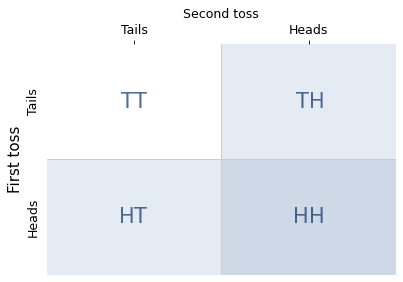

In [7]:
import utils

labels = ["Tails", "Heads"]
titles = ["First toss", "Second toss"]
text_array = [["TT", "TH"], ["HT", "HH"]]
blue = utils.Bl20

xs = -1, 1
ys = 1, -1

draw_polygon(x=-2, y=-2, w=4, h=4, dx=2, dy=2, alpha=0.1)
draw_rectangle(x=0, y=-2, w=2, h=2, alpha=0.1)
plot_text_array(0, 0, xs, ys, text_array, [blue, blue], size=20)
decorate_quad(labels, titles)

The shaded cells (both light and dark) show the three outcomes where the condition is true; the darker cell shows the one outcome where the statement is true. So the conditional probability is 1/3.

This example demonstrates one of the principles we'll need to understand the puzzles: you have to count the combinations.
If we know that the number of heads is either one or two, it is tempting to think these possibilities are equally likely.
But there is only one way to get two heads, and there are two ways to get one heads.
So the one-heads possibility is more likely.

In the next section, we'll use this method to solve a problem involving dice. But I'll start with a story that sets the scene.

## Can We Get Serious Now?

The 2016 film *Sully* is based on the true story of Captain Chelsea Sullenberger, who famously and improbably landed a large passenger jet in the Hudson River near New York City, saving the lives of all 155 people on board.

In the aftermath of this emergency landing, investigators questioned his decision to ditch the airplane rather than attempt to land at one of two airports nearby.
To demonstrate that these alternatives were feasible, they showed simulations of pilots landing successfully at both airports.

In the movie version of the hearing, Tom Hanks, who played Captain Sullenberger, memorably asks, "Can we get serious now?"
Having seen the simulations, he says, "I'd like to know how many times the pilot practiced that maneuver before he actually pulled it off. Please ask how many practice runs they had."

One of the investigators replies, "Seventeen. The pilot [...] had seventeen practice attempts before the simulation we just witnessed."
And the audience gasps.

Of course this scene is fictionalized, but the logic of this exchange is consistent with the actual investigation. It is also consistent with the laws of probability.

If someone accomplishes an unlikely feat, you are right to suspect it was not their first try.
And the more unlikely the feat, the more attempts you might guess they made.

I will demonstrate this point with coins and dice. Suppose I toss a coin and, based on the outcome, roll a die either once or twice.
I don't let you see the coin or the die, and you don't know how many times I rolled, but I report that I rolled at least one six.
Which do you think is more likely, that I rolled once or twice?

You might suspect that I rolled twice -- and this time your intuition is correct.
If I get a six, it is more likely that I rolled twice.

To see how much more likely, let's enumerate the possibilities.
The following diagram shows 72 equally likely outcomes.

In [8]:
xs = np.arange(6)
ys = np.arange(6)

In [9]:
text_array1 = np.broadcast_to(xs + 1, (len(xs), len(xs))).T.astype(str)
# text_array1

In [10]:
X, Y = np.meshgrid(xs + 1, ys + 1)
text_array2 = (Y * 10 + X).astype(str)
# text_array2

In [11]:
def decorate_duple():
    gray = "0.8"
    options = dict(lw=1, color=gray)
    plt.vlines(0, -1, 1, **options)
    plt.xlim(-2, 2.07)
    plt.ylim(-1, 1)

    labels = ["Heads, roll once", "Tails, roll twice"]
    plt.xticks([-1, 1], labels)
    plt.yticks([])
    #plt.title("Coin toss")

    ax = plt.gca()
    ax.spines["bottom"].set_color(gray)
    ax.spines["top"].set_color(gray)
    ax.spines["right"].set_color(gray)
    ax.spines["left"].set_color(gray)

    ax.tick_params(axis="x", bottom=False, top=True, labelbottom=False, labeltop=True)

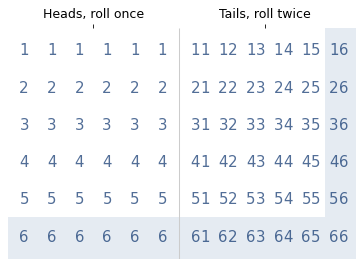

In [12]:
gray = utils.Gray70
blue = utils.Bl20

scale = 3.1
plot_text_array(-1.75, 0.8, xs / scale, -ys / scale, text_array1, [blue])
plot_text_array(0.25, 0.8, xs / scale, -ys / scale, text_array2, [blue, blue])

draw_polygon(x=-2, y=-1, w=4.07, h=4, dx=0.36, dy=0.36, alpha=0.1)

decorate_duple()

The left side shows 36 cases where I roll the die once, using a single digit to represent the outcomes.
The right side shows 36 cases where I roll the die twice: the first digit represents the first roll; the second digit represents the second roll.

The shaded area indicates the outcomes where at least one die is a six. There are 17 in total, 6 when I roll the die once and 11 when I roll it twice.

So if I tell you I rolled at least one six, the probability is 11/17 that I rolled the die twice, which is about 65%.

In [13]:
11 / 17

0.6470588235294118

So, if you succeed at something difficult, it is likely you had more than one chance.

## The Two Child Problems

Next we'll solve two puzzles made famous by Martin Gardner in his *Scientific American* column in 1959. He posed the first like this:

> Mr. Jones has two children. The older child is a girl. What is the probability that both children are girls?

The real world is complicated, so let's assume that these problems are set in a world where all children are boys or girls with equal probability.

With that simplification, there are four equally likely combinations of two children, shown in the following diagram.

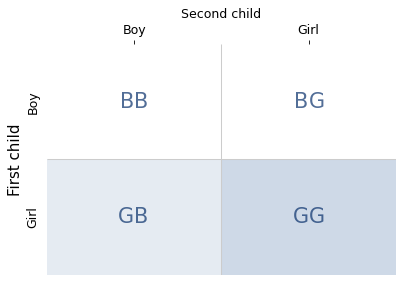

In [14]:
labels = ["Boy", "Girl"]
titles = ["First child", "Second child"]
text_array = [["BB", "BG"], ["GB", "GG"]]
blue = utils.Bl20

xs = -1, 1
ys = 1, -1

draw_rectangle(x=-2, y=-2, w=4, h=2, alpha=0.1)
draw_rectangle(x=0, y=-2, w=2, h=2, alpha=0.1)
plot_text_array(0, 0, xs, ys, text_array, [blue, blue], size=20)
decorate_quad(labels, titles)
plt.savefig('florida2.png', dpi=300)

The shaded areas show the families where the condition is true -- that is, the first child is a girl.
The darker area shows the only family where the statement is true -- that is, both children are girls.

There are two possibilities where the condition is true and one of them where the statement is true, so the conditional probability is 1/2.
This result confirms what you might have suspected: the sex of the older child is irrelevant.
The probability that the second child is a girl is 1/2, regardless.

Now here's the second problem, which I have revised to make it easier to compare with the first part:

> Mr. Smith has two children. At least one of them is a [girl]. What is the probability that both children are [girls]?

Again, there are four equally likely combinations of two children, shown in the following diagram.

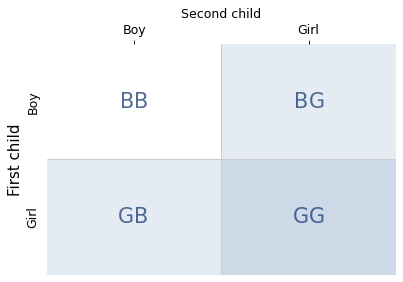

In [15]:
draw_polygon(x=-2, y=-2, w=4, h=4, dx=2, dy=2, alpha=0.1)
draw_rectangle(x=0, y=-2, w=2, h=2, alpha=0.1)
plot_text_array(0, 0, xs, ys, text_array, [blue, blue], size=20)
decorate_quad(labels, titles)
plt.savefig('florida3.png', dpi=300)

Now there are three possibilities where the condition is true -- that is, at least one child is a girl.
In one of them, the statement is true -- that is, both children are girls.
So the conditional probability is 1/3.

This problem is identical to the coin example, and it demonstrates the same principle: you have to count the combinations.
There is only one way to have two girls, but there are two ways to have a boy and a girl.
So if a family has at least one girl, it is more likely that they have only one.

## More Variations

Now let's consider a series of related questions where:

* One of the children is a girl born on Saturday,

* One of the children is a left-handed girl, and finally

* One of the children is a girl named Florida.

To avoid real-world complications, let's assume:

* Children are equally likely to be born on any day of the week.

* One child in 10 is left-handed.

* One child out of 1000 is named Florida.

* Children are independent of one other in the sense that the attributes of one (birth day, handedness, and name) do not affect the attributes of the others.

Let's also assume that "one of the children" means at least one, so a family could have two girls born on Saturday, or even two girls named Florida.

## Saturday's Child

> In a family with two children, what are the chances, if one of the children is a girl born on Saturday, that both children are girls?

To answer this question, we'll divide each of the four boy-girl combinations into 49 day-of-the-week combinations.

I'll represent days with the digits 1 through 7, with 1 for Sunday and 7 for Saturday.
And I'll represent families with two digit numbers; for example, the number 17 represents a family where the first child was born on Sunday and the second child was born on Saturday.

The following diagram shows the four possible orders for boys and girls, and within them, the 49 possible orders for days of the week.

In [16]:
xs = np.arange(7)
ys = np.arange(7)

X, Y = np.meshgrid(xs + 1, ys + 1)
text_array = (Y * 10 + X).astype(str)

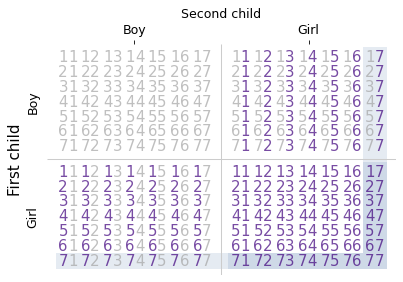

In [17]:
plt.figure(figsize=(6, 4))

boy = utils.Gray70
girl = utils.Pu20

labels = ["Boy", "Girl"]
titles = ["First child", "Second child"]

scale = 3.9
plot_text_array(-1.76, 1.76, xs / scale, -ys / scale, text_array, [boy, boy])
plot_text_array(0.22, 1.76, xs / scale, -ys / scale, text_array, [boy, girl])
plot_text_array(-1.76, -0.22, xs / scale, -ys / scale, text_array, [girl, boy])
plot_text_array(0.22, -0.22, xs / scale, -ys / scale, text_array, [girl, girl])

draw_polygon(x=-1.9, y=-1.9, w=3.8, h=3.84, dx=0.27, dy=0.28, alpha=0.1)
draw_polygon(x=0.08, y=-1.9, w=1.82, h=1.84, dx=0.27, dy=0.28, alpha=0.1)

decorate_quad(labels, titles)
plt.savefig('florida4.png', dpi=300)

The shaded area shows the possibilities where the condition is true -- that is, at least one of the children is a girl born on a Saturday.
And the darker area shows the possibilities where the statement is true -- that is, both children are girls.

There are 27 cases where the condition is true.
In 13 of them, the statement is true, so the conditional probability is 13/27, which is about 48%.

In [18]:
13 / 27

0.48148148148148145

So it turns out that the day of the week is not irrelevant.
If at least one child is a girl, the probability of two girls is about 33%.
If at least one child is a girl born on Saturday, the probability of two girls is about 48%.

Now let's see what happens if the girl is left-handed.

## Left-handed girl

> In a family with two children, what are the chances, if one of the children is a left-handed girl, that both children are girls?

Let's assume that 1 child in 10 is left-handed, and if one sibling is left-handed, it doesn't change the probability that the other is.

The following diagram shows the possible combinations, using "R" to represent a right-handed child and "L" to represent a left-handed child.
Again, the shaded areas show where the condition is true; the darker area shows where the statement is true.

In [19]:
xs = np.arange(10)
ys = np.arange(10)

letters = np.array(list("RRRRRRRRRL"), dtype=object)
X, Y = np.meshgrid(letters, letters)
text_array = Y + X

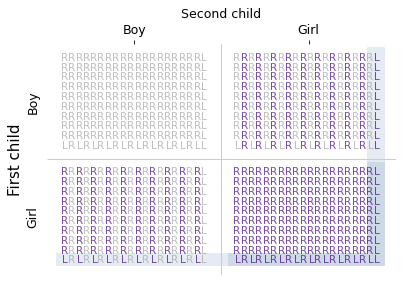

In [20]:
plt.figure(figsize=(6, 4))

scale = 5.9
options = dict(size="small")
plot_text_array(-1.76, 1.76, xs / scale, -ys / scale, text_array, [boy, boy], **options)
plot_text_array(0.22, 1.76, xs / scale, -ys / scale, text_array, [boy, girl], **options)
plot_text_array(
    -1.76, -0.22, xs / scale, -ys / scale, text_array, [girl, boy], **options
)
plot_text_array(
    0.22, -0.22, xs / scale, -ys / scale, text_array, [girl, girl], **options
)

draw_polygon(x=-1.9, y=-1.86, w=3.78, h=3.8, dx=0.21, dy=0.23, alpha=0.1)
draw_polygon(x=0.08, y=-1.86, w=1.80, h=1.8, dx=0.21, dy=0.23, alpha=0.1)

decorate_quad(labels, titles)
plt.savefig('florida5.png', dpi=300)

There are 39 combinations where at least one child is a left-handed girl.
Of them, there are 19 combinations where both children are girls.
So the conditional probability is 19/39, which is about 49%.

In [21]:
19 / 39, 1999 / 3999

(0.48717948717948717, 0.49987496874218557)

Now we're starting to see a pattern.
If the probability of a particular attribute, like birthday or handedness, is 1 in $n$, the number of cases where the condition is true is $4n-1$, and the number of cases where the statement is true is $2n-1$.
So the conditional probability is $(2n-1) / (4n-1)$.

Looking at the diagram, we can see where the terms in this expression come from. The multiple of four represents the segments of the L-shaped region where the condition is true; the multiple of two represents the segments where the statement is true.
And we subtract one from the numerator and denominator so we don't count the case in the lower-right corner twice. 

In the days-of-the-week example, $n$ is 7 and the conditional probability is 13/27, about 48%.
In the handedness example, $n$ is 10 and the conditional probability is 19/39, about 49%.
And for the girl named Florida, who is 1 in 1000, the conditional probability is 1999/3999, about 49.99%.
As $n$ increases, the conditional probability approaches 1/2.

Going in the other direction, if we choose an attribute that's more common, like 1 in 2, the conditional probability is 3/7, around 43%.
And if we choose an attribute that everyone has, $n$ is 1 and the conditional probability is 1/3.

In general for problems like these, the answer is between 1/3 and 1/2, closer to 1/3 if the attribute is common, and closer to 1/2 if, like the name Florida, it is rare.

## But Why?

At this point I hope you are satisfied that the answers we computed are correct.
Enumerating the sample space, as we did, is a reliable way to compute conditional probabilities.
But it might not be clear *why* additional information, like the name of a child or the day they were born, is relevant to the probability that a family has two girls.

The key is to remember what we learned from *Sully*: if you succeed at something improbable, you probably made more than one attempt.

If a family has a girl born on Saturday, they have done something moderately improbable,
which suggests that they had more than one chance, that is, more than one girl.
If they have a girl named Florida, which is more improbable, it is more likely that they have two girls.

These problems seem paradoxical because we have a strong intuition that the additional information is irrelevant.
The resolution of the paradox is that our intuition is wrong.

In these examples, names and birthdays are relevant because they make the condition of the conditional probability more strict.
And if you meet a strict condition, it is likely that you had more than one chance.

## A Random Child Is a Girl

Before we close the book on The Two Child Problem, there's one more issue we should address, which is the difficulty of posing the question.
If you are not careful, it is easy to ask a subtly different question with a totally different answer. 
For example, here's a version of the problem dressed up with some storytelling:

> Suppose you meet a father walking with a girl he introduces as his daughter. If he has two children, what is the probability his other child is also a girl?

As always, the most reliable way to answer a question like this is to enumerate the possibilities.
To start, let's assume that this father is equally likely to be out walking with either of his children.
In that case, for each family, there are two possibilities: the father might be walking with the first child or the second.

The following diagram enumerates these possibilities, where "Bx" indicates that the father is walking with the first child, who is a boy, and "xG" indicates that the father is walking with the second child, who is a girl.

In [22]:
xs = np.arange(2)
ys = np.arange(1)

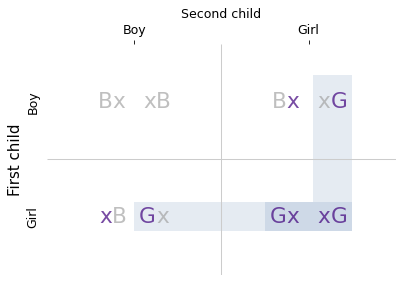

In [23]:
scale = 2
options = dict(size="xx-large")
plot_text_array(-1.25, 1, xs / scale, -ys / scale, ["Bx", "xB"], [boy, boy], **options)
plot_text_array(0.75, 1, xs / scale, -ys / scale, ["Bx", "xG"], [boy, girl], **options)
plot_text_array(
    -1.25, -1, xs / scale, -ys / scale, ["xB", "Gx"], [girl, boy], **options
)
plot_text_array(
    0.75, -1, xs / scale, -ys / scale, ["Gx", "xG"], [girl, girl], **options
)

draw_polygon(x=-1, y=-1.25, w=2.5, h=2.7, dx=0.45, dy=0.5, alpha=0.1)
draw_rectangle(x=0.5, y=-1.25, w=1, h=0.5, alpha=0.1)

decorate_quad(labels, titles)

The shaded areas show the four possibilities where the condition is true -- that is, we observe the father walking with a girl.
The darker area shows the two possibilities where the statement is true -- that is, the family has two girls.
So the conditional probability is 1/2.

But this result is based on the assumption that fathers are equally likely to walk with either child.
Instead, suppose it turns out that, in a family with a boy and a girl, fathers walk with their sons 2/3 of the time and their daughters 1/3 of the time.

If we observe each father three times:

* In a family with two girls, we would see the father with a daughter all three times.

* In a boy-girl family, we would see the father with his daughter one time out of three.

* In a girl-boy family, we would see the father with his daughter one time out of three.

In total, there are five cases where we see a father with his daughter.
Of those, there are three cases where the family has two girls, so the conditional probability is 3/5.

This example shows that subtly different versions of these problems can have substantially different answers.

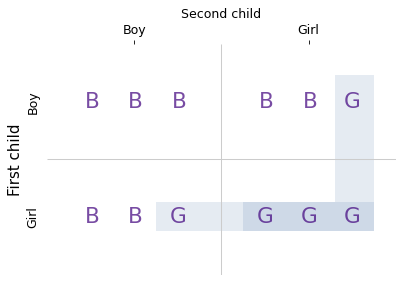

In [24]:
xs = np.arange(3)
ys = np.arange(1)

scale = 2
options = dict(size="xx-large")
plot_text_array(-1.4, 1, xs / scale, -ys / scale, ["B", "B", "B"], [girl], **options)
plot_text_array(0.6, 1, xs / scale, -ys / scale, ["B", "B", "G"], [girl], **options)
plot_text_array(-1.4, -1, xs / scale, -ys / scale, ["B", "B", "G"], [girl], **options)
plot_text_array(0.6, -1, xs / scale, -ys / scale, ["G", "G", "G"], [girl], **options)

draw_polygon(x=-0.75, y=-1.25, w=2.5, h=2.7, dx=0.45, dy=0.5, alpha=0.1)
draw_rectangle(x=0.25, y=-1.25, w=1.5, h=0.5, alpha=0.1)

decorate_quad(labels, titles)

## Be Careful What You Ask For

When I first wrote about these problems in 2011, a reader objected that the wording of the questions is ambiguous.
For example, here's Gardner's version again (with my revision):

> Mr. Smith has two children. At least one of them is a [girl]. What is the probability that both children are [girls]?

And here is the objection:

* If we pick a family at random, ask if they have a girl, and learn that they do, the probability is 1/3 that the family has two girls.

* But if we pick a family at random, choose one of the children at random, and find that she's a girl, the probability is 1/2 that the family has two girls.

In either case, we know that the family has at least one girl, but the answer depends on how we came to know that.

I am sympathetic to this objection, up to a point.
Yes, the question is ambiguous, but natural language is almost always ambiguous.
As readers, we have to make assumptions about the author's intent.

If I tell you that it's April, and ask for the probability that it's raining, you would be reasonable to assume that every day in April is equally likely.
You would be less reasonable to ask how I came to know that it's April.

And if I tell you that a family has at least one girl, without specifying how I came to know it, it's reasonable to assume that all families with a girl are equally likely.

I think that's the natural interpretation of the question and, based on the answers Gardner and Mlodinow provide, that's the interpretation they intended.

I offered this explanation to the reader who objected, but he was not satisfied.
He replied at length, writing almost 4000 words about this problem, which is longer than this chapter.
Sadly, we were not able to resolve our differences.

But this exchange helped me understand the difficulty of explaining this problem clearly, which helped when I wrote this chapter.
So, if you think I succeeded, it's probably because I had more than one chance.

## Sources and Further Reading

* Martin Gardner wrote about the Boy or Girl Paradox in his *Scientific American* column in October 1959. The article is reprinted with updates in *The second Scientific American book of mathematical puzzles and diversions*, University of Chicago Press, 1987.

* My first attempt to explain the girl named Florida is a blog post from 2011 that elicited extensive commentary: [Girl Named Florida solutions](https://allendowney.blogspot.com/2011/11/girl-named-florida-solutions.html). I made another attempt in 2020, using computational tools to enumerate the cases: [The Girl Named Florida](https://www.allendowney.com/blog/2020/02/16/the-girl-named-florida).

* John Tierney wrote about the Boy or Girl Paradox in his *New York Times* online column, [TierneyLab](https://www.nytimes.com/1991/07/21/us/behind-monty-hall-s-doors-puzzle-debate-and-answer.html); it includes a comment from a reader describing experiments related to the psychology of probability.

Probably Overthinking It: The Puzzles and Paradoxes of Probability

Copyright 2021 Allen Downey 

[MIT License](https://en.wikipedia.org/wiki/MIT_License)